In [3]:
import numpy as np
from numpy import sin
from numpy import cos
import matplotlib.pyplot as plt

In [4]:
def betha(a, q):
  return np.sqrt(np.power(a,2)+np.power(q,2))

def phaseShiftFunc(a, q):
  b = betha(a, q)
  return np.arctan((a*sin(b)*cos(a)-b*sin(a)*cos(b))/(b*cos(b)*cos(a)+a*sin(b)*sin(a)))

def slicer(a):
  sign = False # negative
  res = [np.array([])]
  for i, n in enumerate(a):
    if n < 0:
      if sign:
        sign = False
        res.append(np.array([n+np.pi]))
      else:
        res[-1] = np.append(res[-1], [n+np.pi]) 
    else:
      if sign is False:
        sign = True
        res.append(np.array([n]))
      else:
        res[-1] = np.append(res[-1], [n]) 
  if sign:
    return np.append( res[-2], res[-1])
  else:
    return res[-1]

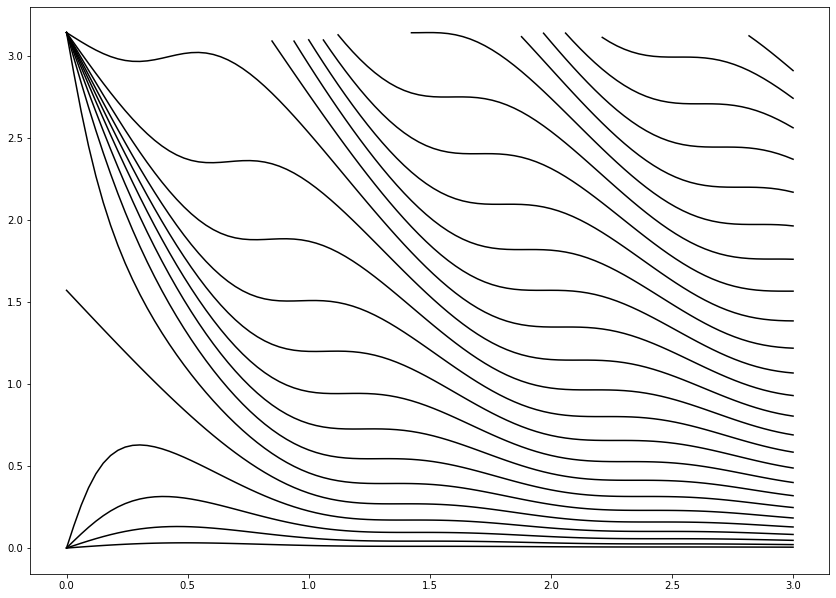

In [6]:
nn = 100
k = np.linspace(0.0001, 3*np.pi, nn)
dq = 0.1*np.pi
q = 0.1*np.pi

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
fig.set_size_inches(18.5, 10.5)

for i in range(25):
  phase = phaseShiftFunc(k, q)
  phase = slicer(phase)
  q = q + dq
  ax.plot(k[-phase.size:]/np.pi, phase, 'k')